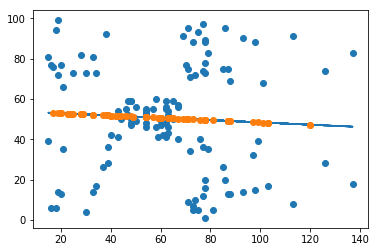

[33.0, 77.0, 126.0, 21.0, 48.0, 30.0, 71.0, 67.0, 70.0, 88.0, 62.0, 44.0, 28.0, 73.0, 18.0, 63.0, 67.0, 87.0, 15.0, 126.0, 71.0, 54.0, 48.0, 87.0, 30.0, 60.0, 19.0, 18.0, 19.0, 113.0, 81.0, 16.0, 65.0, 48.0, 72.0, 20.0, 85.0, 50.0, 75.0, 78.0, 93.0, 54.0, 63.0, 54.0, 50.0, 78.0, 60.0, 19.0, 76.0, 103.0, 37.0, 47.0, 62.0, 39.0, 65.0, 93.0, 78.0, 98.0, 48.0, 63.0, 62.0, 99.0, 101.0, 77.0, 21.0, 97.0, 58.0, 78.0, 78.0, 46.0, 74.0, 77.0, 34.0, 54.0, 71.0, 61.0, 25.0, 79.0, 33.0, 62.0, 88.0, 54.0, 54.0, 62.0, 79.0, 17.0, 61.0, 20.0, 47.0, 85.0, 137.0, 74.0, 73.0, 72.0, 57.0, 78.0, 38.0, 39.0, 67.0, 43.0, 16.0, 137.0, 40.0, 75.0, 77.0, 43.0, 62.0, 73.0, 58.0, 86.0, 59.0, 69.0, 48.0, 113.0, 86.0, 98.0, 15.0, 63.0, 78.0, 34.0]
RMSE: 24.696


In [3]:
# Simple Linear Regression on the Swedish Insurance Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Split a dataset into a train and test set
def train_test_split(dataset, split):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    rmselist = list()
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        rmselist.append(sqrt(prediction_error**2))
    mean_error = sum_error / float(len(actual))
    #plt.plot(actual,'.')
    #plt.plot(predicted,'.','b')
    #plt.show()
    return sqrt(mean_error)

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	return rmse

# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[3] for row in dataset]
    y = [row[4] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    #print(b1)
    #print(b0)
    
    
    return [b0, b1,x,y]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    input_line=list()
    b0, b1,x,y = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[3]
        input_line.append(row[3])
        
        
        predictions.append(yhat)
    best_line=[(b1*i)+b0 for i in x]
    plt.scatter(x,y)
    plt.plot(x,best_line,input_line,predictions,'o')
    plt.show()
    print(x)
        
    
    return predictions

# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = 'Mall_Customers.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-3):
	str_column_to_float(dataset, i+3)
'''    
xx = [row[0] for row in dataset]
yy= [row[1] for row in dataset]
'''
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))